<a href="https://colab.research.google.com/github/harshsaini1129/Data-Science/blob/main/polynomial_regression1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import PolynomialFeatures ,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# for degree =2
# randn is useful when you need normally distributed data
# while rand is for uniform data. They serve different purposes depending on the
# distribution you need.
#np.random.randn() generates samples from a standard normal distribution
#(mean 0, variance 1).
#np.random.rand() generates samples from a uniform distribution over [0, 1].
#
#
x =6*np.random.rand(200,1)-3

y =0.8*x**2 +0.9*x +2 +np.random.randn(200,1)

#equation  y =2+0.9x +0.8x^2 +noise




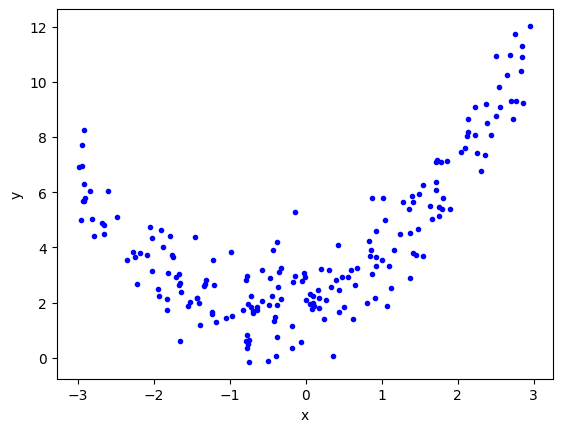

In [ ]:

plt.plot(x,y,'b.') # b. -> blue dot
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size =0.2)

In [ ]:
# apply lr model
lr =LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
#For many practical purposes, an R² above 0.7-0.8 is considered good, while
# anything below 0.3-0.4 suggests poor predictive power.
y_pred =lr.predict(x_test)
r2_score_lr= r2_score(y_test,y_pred)
r2_score_lr

0.3650703650991206

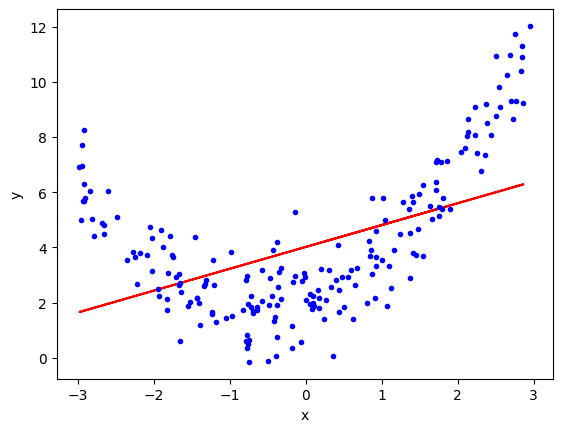

In [ ]:
plt.plot(x_train,lr.predict(x_train),color='r')
plt.plot(x,y,'b.') # b. -> blue dot
plt.xlabel('x')
plt.ylabel('y')
plt.show()




POLYNOMIAL REGRESIION


In [ ]:
#this bias term helps the model fit data better by allowing a constant offset.
poly = PolynomialFeatures(degree =2,include_bias =True)
x_train_trans= poly.fit_transform(x_train)
x_test_trans =poly.transform(x_test)

In [ ]:
print(x_train[0])

[0.27291371]


In [ ]:
print(x_train_trans[0])

[1.         0.27291371 0.0744819 ]


In [ ]:
# train the model
lr =LinearRegression()
lr.fit(x_train_trans,y_train)

LinearRegression()

In [ ]:
y_pred =lr.predict(x_test_trans)

In [ ]:
#
r2_score_lr =r2_score(y_test,y_pred)
r2_score_lr


0.8578116684149814

In [ ]:
print(lr.coef_)

[[0.         0.83212145 0.7907715 ]]


In [ ]:
print(lr.intercept_)

[2.00000738]


# lets say we have new set of data

 x_new_poly =poly.transform(x_new) You're adding new columns to the data because you are using a polynomial regression model. Linear regression models work on the original features, but polynomial regression models work on transformations of the original features, specifically polynomial transformations.

Here's why adding new columns is necessary for polynomial regression:

Capturing Non-Linear Relationships: The original data x and y have a non-linear relationship (specifically, a quadratic relationship, as defined by y = 0.8*x**2 + 0.9*x + 2 + noise). A standard linear regression model can only fit a straight line to the data. To fit a curve (like the parabola in your example), you need to provide the linear model with features that represent the non-linear terms.

Creating Polynomial Features: The PolynomialFeatures(degree=2, include_bias=True) object does this transformation for you.

degree=2 tells it to create features up to the second power of the original feature.
include_bias=True adds a column of ones, which acts as the intercept term in the linear model.
For each sample x_i, the transformation creates the following features:

1 (bias term)
x_i (the original feature)
x_i^2 (the squared feature)
Linear Model on Transformed Features: Once you have these new columns (the bias term, the original feature, and the squared feature), you can then use a standard LinearRegression model. The linear model will learn coefficients for each of these transformed features. So, instead of fitting a line like y = b0 + b1*x, it fits a model like y = c0 * 1 + c1 * x + c2 * x^2, which is the equation of a parabola.

In [ ]:
#the transformation will add a column of ones (for the bias term) and a column
#with the squared values of x_new.


x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly =poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

In [ ]:
y_new =lr.predict(x_new_poly)

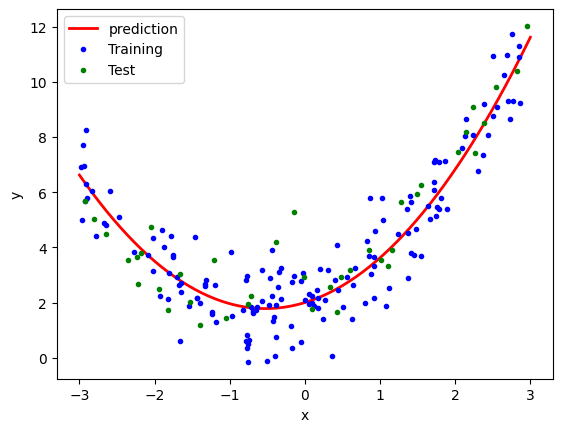

In [ ]:
#In essence, x_new provides the range of input values for which you want to see
#the model's prediction, and y_new contains the predicted outputs for those specific input values.
plt.plot(x_new,y_new,color='r',linewidth=2,label='prediction')
plt.plot(x_train,y_train,'b.',label='Training')
plt.plot(x_test,y_test,'g.',label ='Test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# function to use diff degrees
def polynomial_regression(degree):
  x_new =np.linspace(-3,3,100).reshape(100,1)
  x_new_poly =poly.transform(x_new)

  polybig_features =PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler =StandardScaler()
  lin_reg =LinearRegression()
  polynomial_regression= Pipeline([('poly_features',polybig_features),('std_scaler',std_scaler),('lin_reg',lin_reg)])
  polynomial_regression.fit(x,y)
  y_newbig =polynomial_regression.predict(x_new)
  plt.plot(x_new,y_newbig,color='r',linewidth=2,label='degree' +str(degree))
  plt.plot(x_train,y_train,'b.')
  plt.plot(x_test,y_test,'g.')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend(loc ='upper left')
  plt.axis([-3,3,0,10])
  plt.legend()
  plt.show()






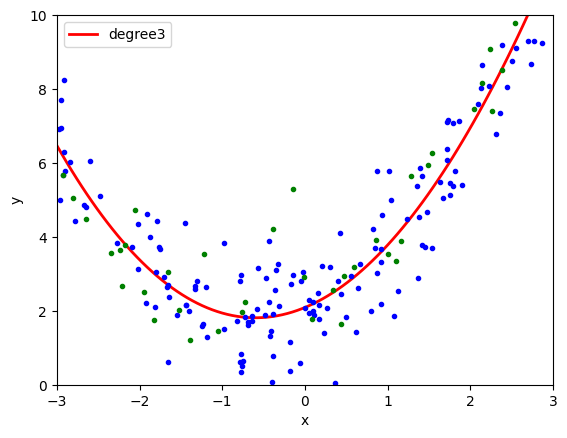

In [ ]:

polynomial_regression(3)

In [ ]:
poly.powers_

array([[0],
       [1],
       [2]])

VISUALISE DATA USING  A 3D PLOT

In [ ]:
# 3d plotting
x =7*np.random.rand(100,1)-2.8
y=7*np.random.rand(100,1)-2.8
z = x**2 +y**2+ 0.2*x +0.2*y +0.1*x*y + 2 +np.random.rand(100,1)



Your x, y, and z variables were created with a shape of (100, 1), meaning they were 2D arrays with 100 rows and 1 column.
plotly.express.scatter_3d expects 1D arrays or pandas Series for the x, y, and z arguments.
.ravel() transforms the (100, 1) arrays into (100,) 1D arrays, which are suitable for use with px.scatter_3d.
Essentially, .ravel() takes an array of any shape and converts it into a flat array containing all the same elements in a linear sequence.

In [ ]:
import plotly.express as px
df =px.data.iris()
fig =px.scatter_3d(df,x=x.ravel(),y =y.ravel(), z =z.ravel())
fig.show()

